## Normal workbook setup

> Note: we are using the following dependencies and `talib-binary` only has a binary for Linux. This is a wrapper for [talib](https://github.com/mrjbq7/ta-lib), which for talib it requires installing [TA-LIB](https://ta-lib.org/) (the C++ native library) manually. 

```
[tool.poetry.dependencies]
python = "^3.7"
jupyter = "^1.0.0"
notebook = "^6.0.2"
numpy = "^1.18.1"
scipy = "^1.4.1"
matplotlib = "^3.1.2"
scikit-learn = "^0.22.1"
jupyter_contrib_nbextensions = "^0.5.1"
watermark = "^2.0.2"
jupyterlab = "^1.2.6"
pylint = "~=2.4.4"
pyalgotrade = "^0.20"
seaborn = "^0.10.0"
pandas = "^1.0.3"
talib-binary = "^0.4.19"
requests = "^2.23.0"

[tool.poetry.dev-dependencies]
flake8 = "^3.7.9"
autopep8 = "^1.5"
```

In [253]:
from datetime import datetime

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import talib

# Data exploration
Here I'm assuming that the data has been downloaded and in `./.data` path.  


In [254]:
%ls -alt ./.data
%cat ./.data/MSFT.csv | head

total 1140
drwxrwxrwx 1 cicorias cicorias   4096 Apr 10 15:58 ../
-rw-rw-rw- 1 cicorias cicorias 245069 Apr 10 11:02 _GSPC.csv
-rw-rw-rw- 1 cicorias cicorias 225079 Apr 10 11:02 GOOG.csv
-rw-rw-rw- 1 cicorias cicorias 223407 Apr 10 11:02 AMZN.csv
drwxrwxrwx 1 cicorias cicorias   4096 Apr 10 11:02 ./
-rw-rw-rw- 1 cicorias cicorias 217472 Apr 10 11:02 AAPL.csv
-rw-rw-rw- 1 cicorias cicorias 212315 Apr 10 11:02 MSFT.csv
Date,Open,High,Low,Close,Adj Close,Volume
2008-03-31,27.879999,28.590000,27.840000,28.379999,21.455233,46780600
2008-04-01,28.830000,29.540001,28.629999,29.500000,22.301943,65796200
2008-04-02,29.570000,29.580000,29.000000,29.160000,22.044899,49499400
2008-04-03,29.000000,29.320000,28.799999,29.000000,21.923944,38961400
2008-04-04,29.129999,29.260000,28.740000,29.160000,22.044899,43860800
2008-04-07,29.549999,29.590000,29.030001,29.160000,22.044899,44428600
2008-04-08,28.940001,29.000000,28.540001,28.750000,21.734947,44733500
2008-04-09,28.719999,29.040001,28.540001,28.889

## Load the data into a dictionary of DataFrames

In [255]:
# load the data

start_date = '01-01-2018'
end_date = '02-29-2020'

symbol_set_raw = ['MSFT', 'AAPL', 'AMZN', 'GOOG', '_GSPC' ]
symbol_set = ['MSFT', 'AAPL', 'AMZN', 'GOOG', 'GSPC' ]
symbol_corp = ['MSFT', 'AAPL', 'AMZN', 'GOOG']
symbol_snp = 'GSPC'

#column_names = ['Date', 'Open', 'High', 'Low', "Close", 'Adj Close']
#column_types = [ datetime, float, float, float, float, float, int ]

data_path = './.data'
dfs = {}

for s in symbol_set_raw:
    filename = '{}/{}.csv'.format(data_path, s)
    symbol = s.replace('_', '')
    dfs[symbol] = pd.read_csv(filename, index_col = 'Date', parse_dates=True)
    dfs[symbol] = dfs[symbol].loc[start_date:end_date]


dfs['MSFT'].info()
dfs['MSFT'].head()
#dfs['GSPC'].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543 entries, 2018-01-02 to 2020-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       543 non-null    float64
 1   High       543 non-null    float64
 2   Low        543 non-null    float64
 3   Close      543 non-null    float64
 4   Adj Close  543 non-null    float64
 5   Volume     543 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 29.7 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,83.029594,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,83.415993,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,84.150192,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,85.193497,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,85.280426,22113000


## Simple Line plot of the S&P with each of the instruments.

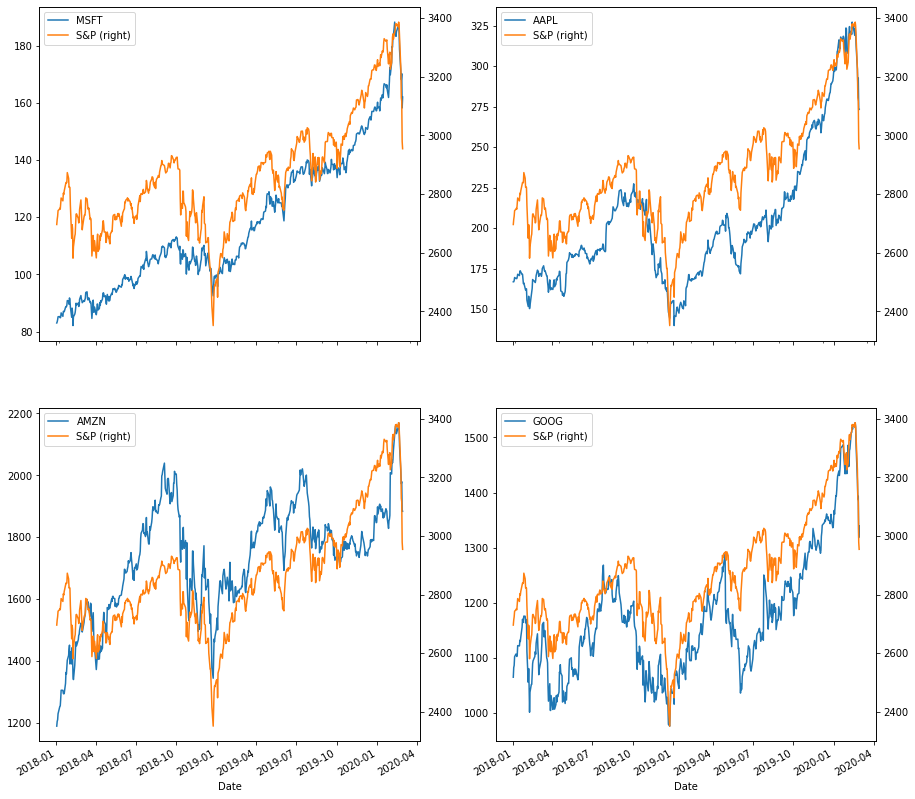

<Figure size 432x288 with 0 Axes>

In [256]:
# Plot Adj_Close for MSFT, AMZN, and S&P
figsize = 15, 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = figsize)

ic = 0
for r in range(0, 2, 1):
    for c in range(0, 2, 1):
        plt.figure(r)
        symbol = symbol_corp[ic]
        df = dfs[symbol]
        df_snp = dfs['GSPC']
        
        df['Adj Close'].plot(label = symbol, legend = True, ax = axes[r,c])
        df_snp['Adj Close'].plot(label = 'S&P', legend =  True, ax = axes[r,c], secondary_y = True)
        ic += 1
    

plt.show()
    


## Look at the pct change over time -- shows volatility

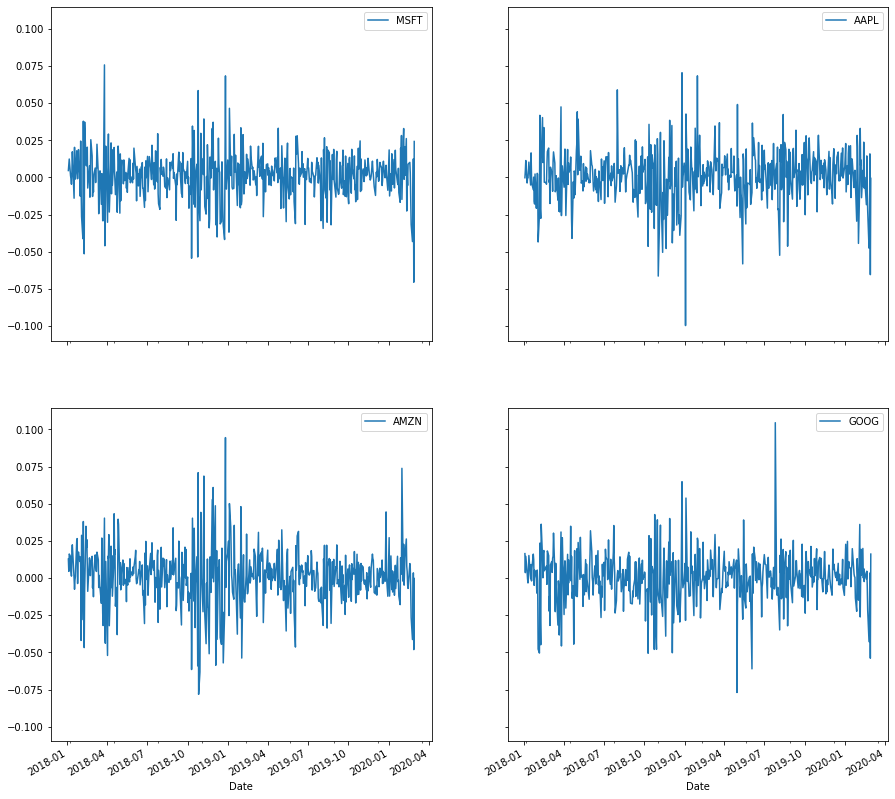

<Figure size 432x288 with 0 Axes>

In [257]:
# Plot pct_change on adj close for MSFT, AMZN, and S&P
# we should see fairly consitent variation around 0

figsize = 15, 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = figsize, sharex = True, sharey = True)

ic = 0
for r in range(0, 2, 1):
    for c in range(0, 2, 1):
        plt.figure(r)
        symbol = symbol_corp[ic]
        df = dfs[symbol]
        df_snp = dfs['GSPC']
        #twin_ax = axes[r,c].twinx()
        
        df['Adj Close'].pct_change().plot(label = symbol, legend = True, ax = axes[r,c])
        #df_snp['Adj Close'].pct_change().plot(label = 'S&P', legend =  True, ax = axes[r,c], secondary_y = True)
        ic += 1
    

plt.show()

## Look at the pct change as a histogram to see how "normal" the PCT change is.
> normal allows for parametric statistics.

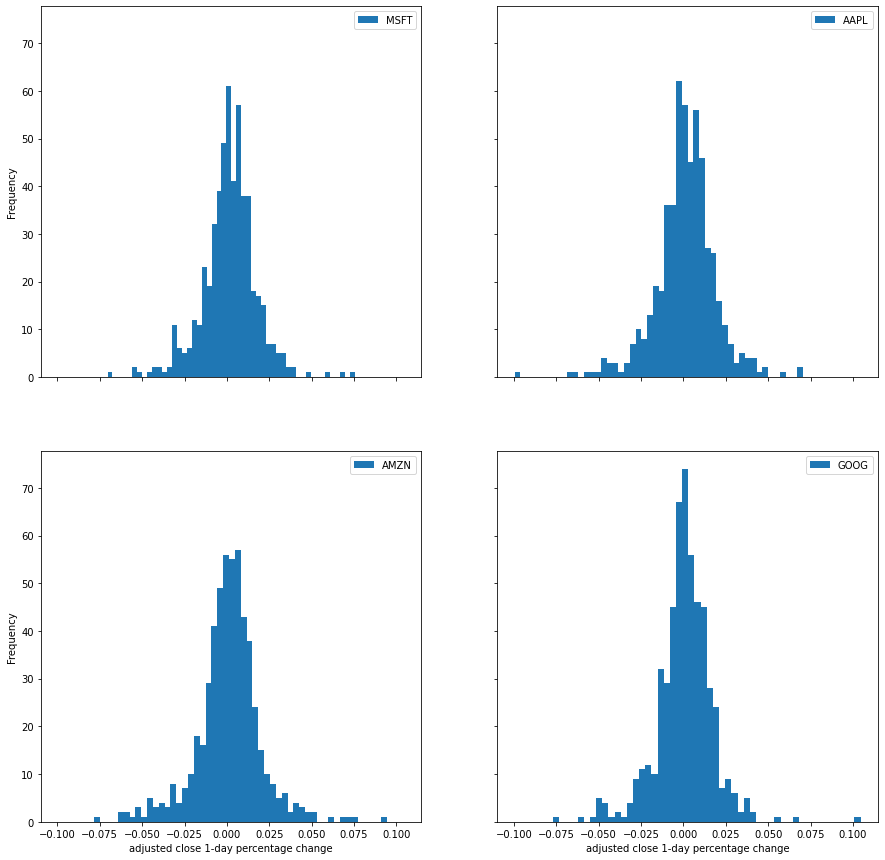

<Figure size 432x288 with 0 Axes>

In [258]:
# plot a histogram of pct change to see how normally distributed the data is.
# normal allows for parametric statistics.

figsize = 15, 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = figsize, sharex = True, sharey = True)

ic = 0
for r in range(0, 2, 1):
    for c in range(0, 2, 1):
        plt.figure(r)
        symbol = symbol_corp[ic]
        df = dfs[symbol]
        df_snp = dfs['GSPC']
        
        df['Adj Close'].pct_change().plot.hist(bins = 50, 
                                               label = symbol, 
                                               legend = True, 
                                               ax = axes[r,c])
        
        #df_snp['Adj Close'].pct_change().plot.hist(bins = 50, label = 'S&P', 
        #                                           legend = True,
        #                                           ax = axes[r,c],
        #                                           secondary_y = True)
        
        #plt.xlabel('')
        axes[r,c].set_xlabel('adjusted close 1-day percentage change')
        
        ic += 1
    

plt.show()

# Generate some basic correlations


correlation for MSFT: 
                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.149322
5d_close_future_pct     -0.149322             1.000000

correlation for AAPL: 
                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.115889
5d_close_future_pct      0.115889             1.000000

correlation for AMZN: 
                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.009768
5d_close_future_pct     -0.009768             1.000000

correlation for GOOG: 
                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.144535
5d_close_future_pct     -0.144535             1.000000

correlation for GSPC: 
                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.003043
5d_close_future_pct      0.003043             1.000000


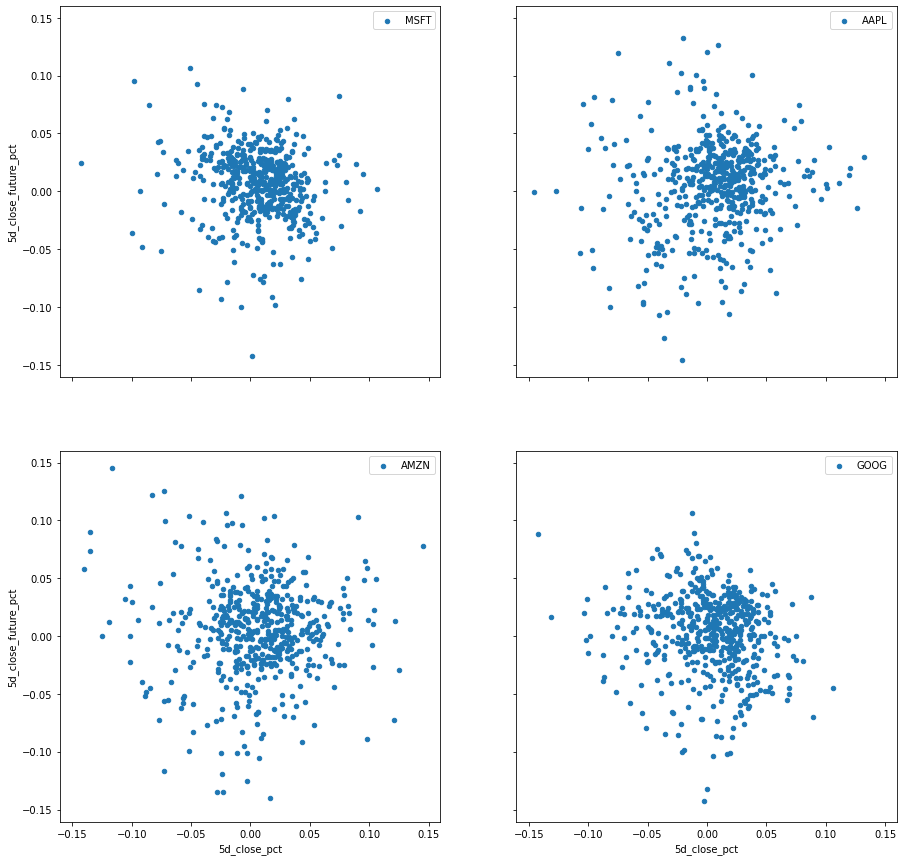

<Figure size 432x288 with 0 Axes>

In [259]:
# create n-Day % changes of Adj Close for current day and 5 days in future
figsize = 15, 15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = figsize, sharex = True, sharey = True)


shift_in_days = 5

for s in symbol_set:
    df = dfs[s]
    df['5d_future_close']     = df['Adj Close'].shift(-shift_in_days)
    df['5d_close_future_pct'] = df['5d_future_close'].pct_change(shift_in_days)
    df['5d_close_pct']        = df['Adj Close'].pct_change(shift_in_days)
    
    corr = df[['5d_close_pct', '5d_close_future_pct']].corr()
    
    dfs[s] = df
    print('\ncorrelation for {}: \n{}'.format(s, corr))


    
ic = 0
for r in range(0, 2, 1):
    for c in range(0, 2, 1):
        plt.figure(r)
        symbol = symbol_corp[ic]
        df = dfs[symbol]
        #df_snp = dfs['GSPC']
        #twin_ax = axes[r,c].twinx()
        
        df.plot.scatter( x='5d_close_pct', y='5d_close_future_pct',  label = symbol, legend = True, ax = axes[r,c])

        ic += 1



# Feature generation

### SMA and [RSI (relative strength index)](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI)

RSI - value close to zero, indicates a move upwards expected, values close to 100 indicates a move downwards expected

In [260]:



def setup_ma_rsi_features(dfs):
    feature_names = []
    sma_periods = [14, 30, 50, 200]
    for n in sma_periods:
            # Add rsi and moving average to the feature name list
            feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    feature_and_targets = dict()
    
    # Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
    for s in symbol_corp:
        df = dfs[s]

        for n in [14, 30, 50, 200]:
            # Create the moving average indicator and divide by Adj_Close
            df['ma' + str(n)] = talib.SMA(df['Adj Close'].values, timeperiod = n) / df['Adj Close']
            # Create the RSI indicator
            df['rsi' + str(n)] = talib.RSI(df['Adj Close'].values,timeperiod = n)


        df = df.dropna()
        features = df[feature_names]
        targets = df['5d_close_future_pct']
        f_and_t_cols = ['5d_close_future_pct'] + feature_names
        
        feature_and_targets[s] = df[f_and_t_cols]
    
    
    
    return feature_and_targets
    


In [261]:
rv = setup_ma_rsi_features(dfs)

pd.set_option('display.width', 160)

corr_results = dict()

for k, v in rv.items():
    corr = v.corr()
    #print('\nsymbol: {}\n'.format(k))
    #print(corr)
    corr_results[k] = corr
    #print('\ncorr: {}: \n {}'.format(k, v))



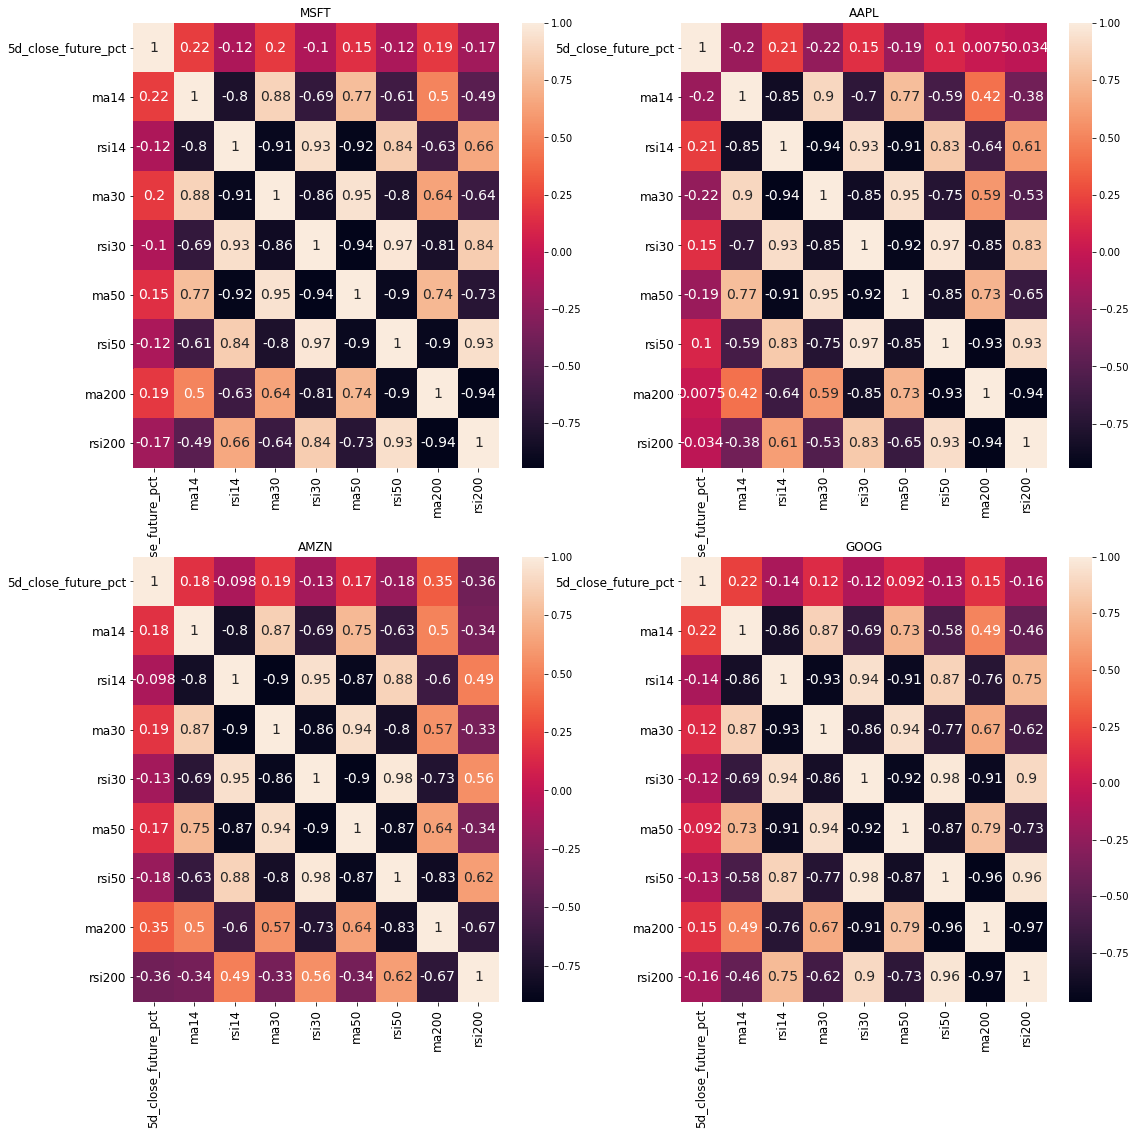

<Figure size 432x288 with 0 Axes>

In [262]:
# Plot heatmap of correlation matrix

figsize = 18, 18
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = figsize) #, sharex = True, sharey = True)


ic = 0
for r in range(0, 2, 1):
    for c in range(0, 2, 1):
        plt.figure(r)
        symbol = symbol_corp[ic]
        df = corr_results[symbol]

        sns.heatmap(df, annot = True, annot_kws = {"size": 14}, ax = axes[r,c], label = symbol)
        axes[r,c].set_title(symbol)
        
        plt.setp(axes[r,c].xaxis.get_majorticklabels(), rotation=90, size = 12)
        plt.setp(axes[r,c].yaxis.get_majorticklabels(), rotation=0, size = 12)
        
        #plt.yticks(rotation=0, size = 14)
        #plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
        #plt.tight_layout()  # fits plot area to the plot, "tightly"
        ic += 1




## Features with greatest correlation (prediction)
The prediction (target is `5d_close_future_pct`)

- MSFT: **ma14**
- APPL: ma30
- AMZN: rma200
- GOOG: **ma14**


